
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1991 through 2015. The [2015](http://www.nserc-crsng.gc.ca/NSERC-CRSNG/FundingDecisions-DecisionsFinancement/ResearchGrants-SubventionsDeRecherche/ResultsGSC-ResultatsCSS_eng.asp?Year=2015) and [2016](http://www.nserc-crsng.gc.ca/NSERC-CRSNG/FundingDecisions-DecisionsFinancement/ResearchGrants-SubventionsDeRecherche/ResultsGSC-ResultatsCSS_eng.asp?Year=2016) data are also available separately as web archives. 

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook starts an exploration of the NSERC investment portfolio during the 1995 -- 2015 epoch. The notebook assumes that you have your AWS keys setup in `~/.aws/credentials`. See the [boto3 docs](http://boto3.readthedocs.io/en/latest/guide/configuration.html) for more information on configuration of credentials. (If you'd like access to the data hosted on S3, please contact [James Colliander](http://colliand.com).)

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](https://pims.jupyter.ca) and for help with this notebook. -- J. Colliander

In [115]:
## Import some Python resources for data and interactive plots.
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
import numpy as np
import seaborn as sns

import sys

from IPython.display import display, clear_output
from ipywidgets import widgets

sns.set_style("darkgrid")

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

In [116]:
## Import the tools for accessing data hosted on AWS S3.
import boto3
import botocore

## name the bucket containing the data
nsercBucket='pims-open-data'

s3 = boto3.client('s3')
exists = True

try:
    s3.head_bucket(Bucket=nsercBucket)
except botocore.exceptions.ClientError as e:
    # If a client error is thrown, then check that it was a 404 error.
    # If it was a 404 error, then the bucket does not exist.
    error_code = int(e.response['Error']['Code'])
    if error_code == 404:
        exists = False

In [118]:
## Bring in a selection of the NSERC awards data starting with 1995 and ending with 2014.
## Throw away as much as you can to keep the DataFrame small enough to manipulate using a laptop.

startYear=1995
endYear=2016  ## This means we include the 2015 collection but not 2016.

nserc = []
institutionAwards = []

s3 = boto3.resource('s3')
bucket = s3.Bucket(nsercBucket)

for year in range(startYear, endYear):
    obj = boto3.client('s3').get_object(
        Bucket=nsercBucket, Key='NSERC_GRT_FYR'+str(year)+'_AWARD.csv')
    df = pd.read_csv(obj['Body'], 
                     encoding='latin1', 
                     usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 28],
                    )
    nserc.append(df)
    df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN','ResearchSubjectEN']   ## Rename various columns for easier access.
    print(year)

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [119]:
## Again, throw away some superfluous data to minimize impact on memory.
try:
    nsercDF = pd.concat(nserc)
    del(nserc)
except NameError:
    print("Namespace already cleaned")

print("DataFrame: {:4.2f} Mb".format(sys.getsizeof(nsercDF) / (1024. * 1024)))  ##Quantify data stored in memory.

DataFrame: 265.04 Mb


In [120]:
## These are the columns in our data table.
nsercDF.columns

Index(['Name', 'Department', 'OrganizationID', 'Institution', 'ProvinceEN',
       'CountryEN', 'FiscalYear', 'AwardAmount', 'ProgramID', 'ProgramNameEN',
       'ResearchSubjectEN'],
      dtype='object')

In [121]:
## This is what the data looks like.
nsercDF

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,ResearchSubjectEN
0,"Aarssen, Lonnie",Biology,29,Queen's University,Ontario,CANADA,1995,41400,RGPIN,Discovery Grants Program - Individual,Terrestrial ecology
1,"Abbott, Harvey",Mathematical Sciences,9,University of Alberta,Alberta,CANADA,1995,14000,RGPIN,Discovery Grants Program - Individual,Combinatorics
2,"Abbott, Sean",Biological Sciences,9,University of Alberta,Alberta,CANADA,1995,5755,PGS,Postgraduate Scholarships,"Taxonomy, systematics and phylogenetics"
3,"Abcarius, John",Electrical Engineering,61,McGill University,Québec,CANADA,1995,10380,PGS,Postgraduate Scholarships,Integrated circuits
4,"Abcarius, Nicole",Head Office,7341,GE Glegg Water Technologies Inc.,Ontario,CANADA,1995,3600,URI,Industrial Undergraduate Student Research Awards,Operations research and management science
5,"Abdalla, Hany",Civil Engineering,70,Concordia University,Québec,CANADA,1995,20985,PDF,Postdoctoral Fellowships,Structural engineering
6,"AbdelAziz, Alaa",Chemistry,21,University of Winnipeg,Manitoba,CANADA,1995,32264,RGPIN,Discovery Grants Program - Individual,Metal and organometallic chemistry
7,"AbdElHalim, Omar",Civil and Environmental Engineering,23,Carleton University,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,Structural materials
8,"AbdelRahman, AbdelFattah",Geology,70,Concordia University,Québec,CANADA,1995,15000,RGPIN,Discovery Grants Program - Individual,"Petrology, igneous and metamorphic geology"
9,"Abdelrahman, Tarek",Electrical and Computer Eng.,31,University of Toronto,Ontario,CANADA,1995,9500,RGPIN,Discovery Grants Program - Individual,Software and development


## Total Invested by NSERC Over Time

We accumulate the award amounts into a total sum for each year and plot these values over time. These calculations do not take inflation or other factors into account.

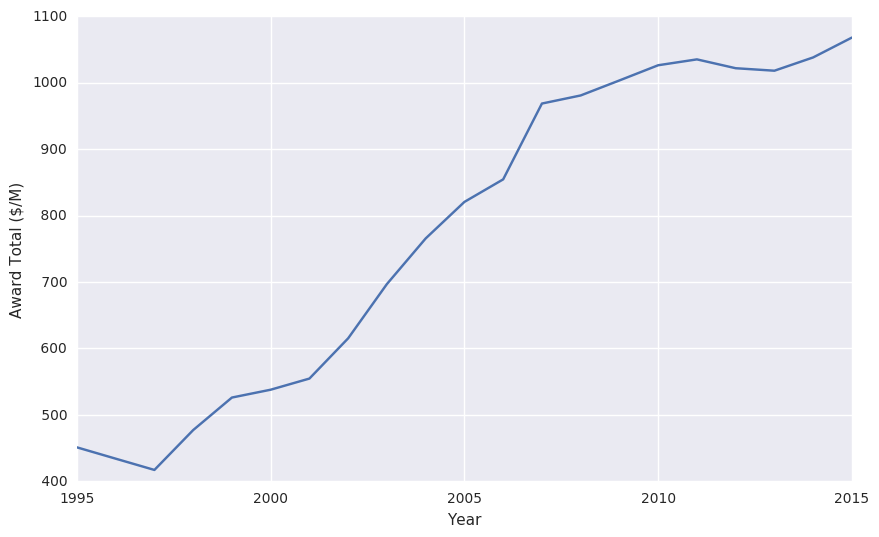

In [122]:
awardTotals = nsercDF.groupby('FiscalYear').sum()['AwardAmount']

import matplotlib.ticker as mtick

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(awardTotals.index, awardTotals/10**6)
ax.set_ylabel('Award Total ($/M)')
ax.set_xlabel('Year')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%4d'))

## 2014 Investments by `Institution`

Let's focus in on 2014. We accumulate all the awards for each institution and sort by the resulting totals. Then, we expose an ordered list of the institutions that received the biggest investments from NSERC.

In [123]:
byInstitution = nsercDF[nsercDF.FiscalYear == 2014].groupby('Institution')
top10 = byInstitution.sum()['AwardAmount'].sort_values(
    ascending=False).head(n=10)
top10

Institution
University of Toronto             89894358
University of British Columbia    75418783
University of Alberta             60280376
University of Waterloo            59567435
McGill University                 59203321
Université Laval                  43043887
McMaster University               38444093
Queen's University                34839270
University of Western Ontario     31639903
University of Calgary             31470112
Name: AwardAmount, dtype: int64

We set colors for these institutions to set up visualizations of the data.

In [124]:
institutionList = list(top10.index)
instColor = zip(institutionList, sns.color_palette())
institutionList

['University of Toronto',
 'University of British Columbia',
 'University of Alberta',
 'University of Waterloo',
 'McGill University',
 'Université Laval',
 'McMaster University',
 "Queen's University",
 'University of Western Ontario',
 'University of Calgary']

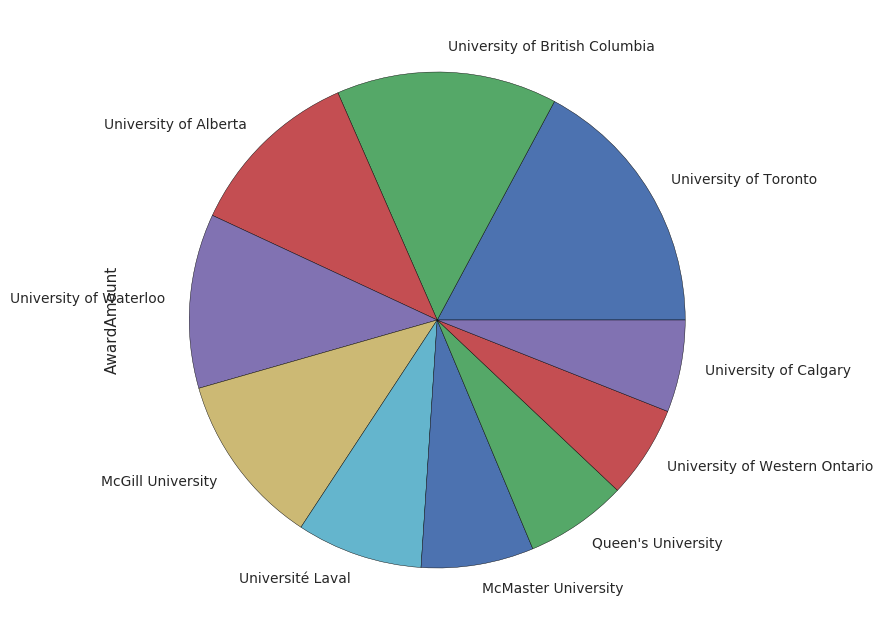

In [125]:
## Make a pie chart.
awards = nsercDF[nsercDF.FiscalYear == 2014].groupby(
    'Institution').sum().sort_values(
    'AwardAmount', ascending=False).head(n=10)
awards.loc[institutionList].plot.pie('AwardAmount',
                                       figsize=(8,8), legend=None)

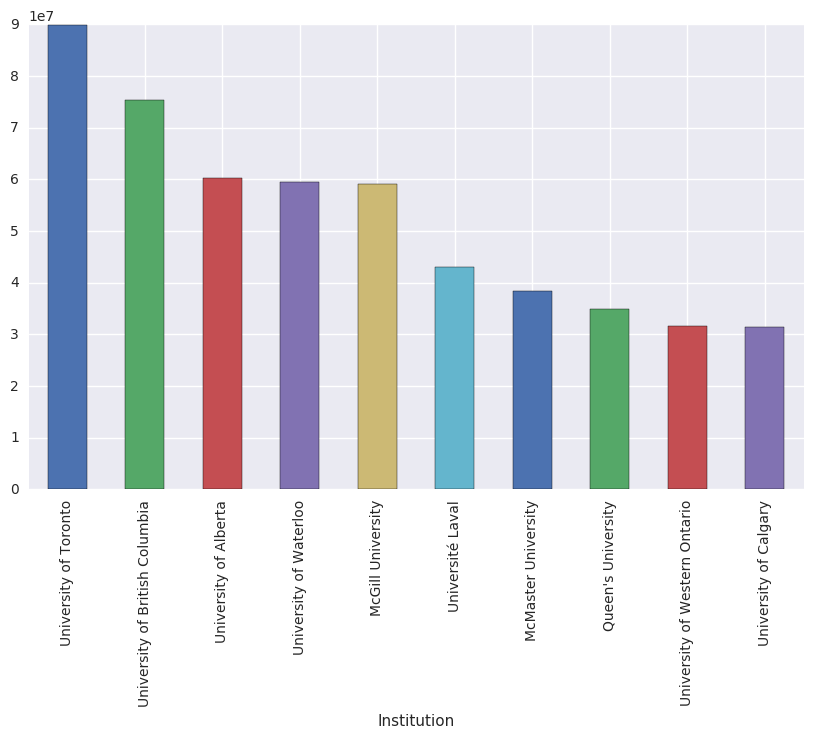

In [126]:
## Make a bar chart.
a = awards.loc[institutionList]['AwardAmount']
a.plot.bar(color=sns.color_palette())

## 2015 Award Totals by `Province`

In [127]:
byProvince = nsercDF[nsercDF.FiscalYear == 2015].groupby('ProvinceEN')
provinceAmounts = byProvince.sum()['AwardAmount'].sort_values(
    ascending=False)
provinceAmounts

ProvinceEN
Ontario                      404535381
Québec                       265635555
British Columbia             153359608
Alberta                      105368666
Saskatchewan                  39492748
Nova Scotia                   32519297
Manitoba                      24563957
New Brunswick                 12808874
Newfoundland and Labrador      9648664
Prince Edward Island           3810706
Massachusetts                  3340214
California                     3013699
New York                       1241315
Michigan                        508500
Yukon                           476213
Pennsylvania                    423000
Illinois                        390500
New Jersey                      369000
Connecticut                     308250
Washington                      264000
Indiana                         214583
Maryland                        162000
Colorado                        154500
Wisconsin                       141000
District of Columbia            110000
Minnesota     

## 2015 Award Totals by `ProgramName`

In [128]:
byProgramName = nsercDF[nsercDF.FiscalYear == 2015].groupby('ProgramNameEN')
programNameAmounts = byProgramName.sum()['AwardAmount'].sort_values(
    ascending=False)
programNameAmounts

ProgramNameEN
Discovery Grants Program - Individual                                                                   318145584
Canada Research Chairs                                                                                  108982860
Collaborative Research and Development Grants                                                            83189033
Engage Grants Program                                                                                    37770946
Strategic Projects - Group                                                                               35914295
Networks of Centres of Excellence                                                                        33430050
Canada First Research Excellence Fund                                                                    31234943
Alexander Graham Bell Canada Graduate Scholarships - Doctoral                                            28090416
Collaborative Research and Training Experience                            

## Specific `Department` within an `Institution` over Time

**UBC Mathematics**

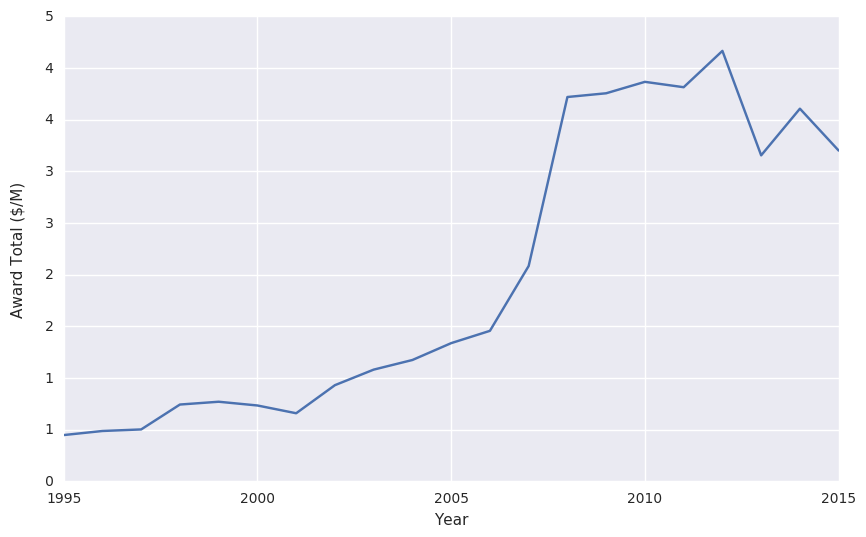

In [137]:
ubcMath = nsercDF.loc[(nsercDF['Department'].isin(['Mathematics'])) 
            & (nsercDF['Institution'].isin(['University of British Columbia']))].groupby('FiscalYear').sum()['AwardAmount']

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(ubcMath.index, ubcMath/10**6)
ax.set_ylabel('Award Total ($/M)')
ax.set_xlabel('Year')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%4d'))

## Big Winners over Time

In [138]:
byName = nsercDF.loc[(nsercDF['AwardAmount'] > 1000000)].groupby('Name')
byName.sum().sort_values(
    'AwardAmount', ascending=False).head(n=50)

,OrganizationID,FiscalYear,AwardAmount
Name,,,
"Hormes, Josef",160,20105,99732800
"Gupta, Arvind",95180,42157,96573750
"McWalter, Ian",261,18099,67033291
"Frise, Peter",629,34128,63289750
"Fortier, Louis",867,34127,57136909
"Barge, Brian",48872,16021,49400000
"Thomlinson, William",80,10025,46550000
"Fedosejevs, Robert",459,18063,35872000
"McDonald, Arthur",377,26014,32863300


The first female researcher on the list of "Big NSERC Winners" during the 1996-2014 timeframe appears in position 33.  

## Individual Principal Investigator

In [139]:
nsercDF.loc[nsercDF['Name'].isin(['Vinet, Luc'])]

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,ResearchSubjectEN
14711,"Vinet, Luc",Centre de recherches mathématiques,63,Université de Montréal,Québec,CANADA,1995,825000,CSPPR,Collaborative Special Project Grants,Not available
14712,"Vinet, Luc",Centre de recherches mathématiques,63,Université de Montréal,Québec,CANADA,1995,126460,CPGPJ,Collaborative Project Grants (H),Combinatorics
14713,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,1995,40000,SAPIN,Subatomic Physics Envelope - Individual,Not available
13249,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1996,119000,CPGPJ,Collaborative Project Grants (H),Combinatorics
13250,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1996,39000,RGPIN,Discovery Grants Program - Individual,Particle physics
13251,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1996,800000,CSPPR,Collaborative Special Project Grants,Not available
13252,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1996,600000,NETGP,Research Networks,Not available
12817,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1997,119000,CPGPJ,Collaborative Project Grants (H),Combinatorics
12818,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1997,39000,RGPIN,Discovery Grants Program - Individual,Particle physics
12819,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1997,800000,CSPPR,Collaborative Special Project Grants,Not available


In [44]:
nsercDF.loc[nsercDF['Name'].isin(['Colliander, James'])]

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,ResearchSubjectEN
3229,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2002,24000,RGPIN,Discovery Grants Program - Individual,Wave propagation
3691,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2003,24000,RGPIN,Discovery Grants Program - Individual,Wave propagation
3810,"Colliander, James",Mathematics (Toronto),31,University of Toronto,Ontario,CANADA,2004,24000,RGPIN,Discovery Grants Program - Individual,Wave propagation
3983,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2005,24000,RGPIN,Discovery Grants Program - Individual,Wave propagation
4045,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2006,24000,RGPIN,Discovery Grants Program - Individual,Wave propagation
4133,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2007,29000,RGPIN,Discovery Grants Program - Individual,Wave propagation
4508,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2008,29000,RGPIN,Discovery Grants Program - Individual,Wave propagation
4368,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2009,29000,RGPIN,Discovery Grants Program - Individual,Wave propagation
4218,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2010,29000,RGPIN,Discovery Grants Program - Individual,Wave propagation
4144,"Colliander, James",Mathematics,31,University of Toronto,Ontario,CANADA,2011,29000,RGPIN,Discovery Grants Program - Individual,Wave propagation


In [140]:
nsercDF.loc[nsercDF['Name'].isin(['Hinton, Geoffrey'])]['AwardAmount'].sum()
## Total Amount Invested in CAD (not corrected for inflation)

4079076

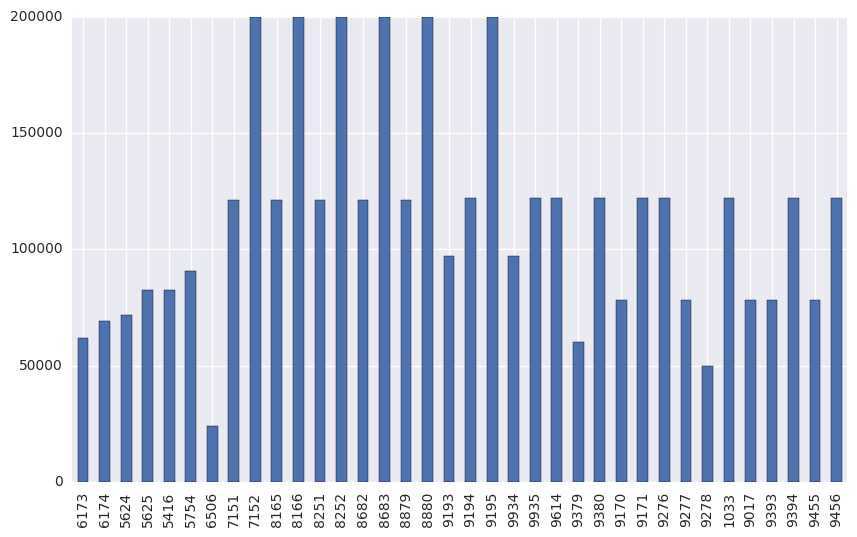

In [141]:
nsercDF.loc[nsercDF['Name'].isin(['Hinton, Geoffrey'])]['AwardAmount'].plot(kind='bar')

## Exploring a Specific Program

In [142]:
nsercDF.loc[nsercDF['ProgramNameEN'].isin(['Canada Excellence Research Chairs'])]['AwardAmount'].sum()

111866666

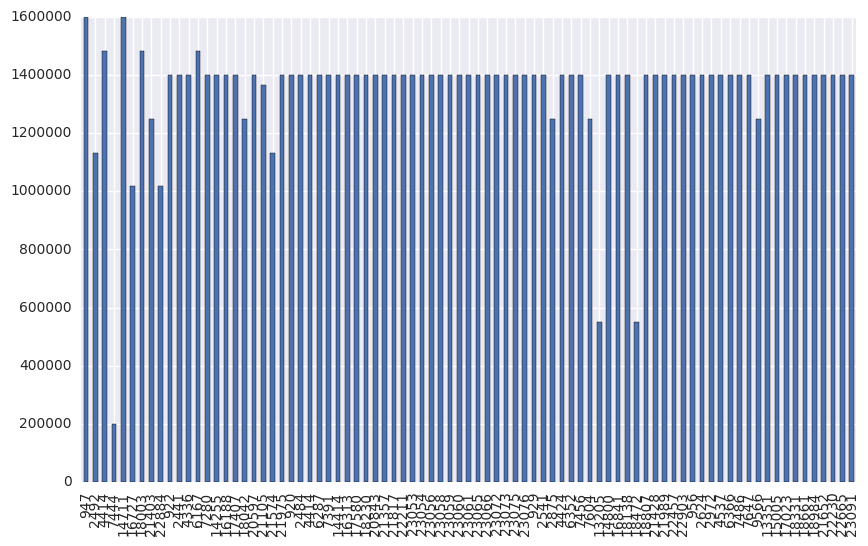

In [143]:
nsercDF.loc[nsercDF['ProgramNameEN'].isin(['Canada Excellence Research Chairs'])]['AwardAmount'].plot(kind='bar')

## Exploring CTRMS Envelope

In [144]:
nsercDF.loc[nsercDF['ProgramID'].isin(['CTRMS'])]['AwardAmount'].sum()

6188000

In [145]:
nsercDF.loc[nsercDF['ProgramID'].isin(['CTRMS'])]

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,ResearchSubjectEN
1201,"Barlow, Martin",Mathematics,2,University of British Columbia,British Columbia,CANADA,2014,885500,CTRMS,Thematic Resources Support in Mathematics and ...,Pure mathematics
4585,"Craig, Walter",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2014,910500,CTRMS,Thematic Resources Support in Mathematics and ...,Pure mathematics
22299,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2014,860500,CTRMS,Thematic Resources Support in Mathematics and ...,Pure mathematics
1234,"Barlow, Martin",Mathematics,2,University of British Columbia,British Columbia,CANADA,2015,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,Pure mathematics
8823,"Hambleton, Ian",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2015,1210500,CTRMS,Thematic Resources Support in Mathematics and ...,Pure mathematics
22533,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2015,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,Pure mathematics


In [39]:
nsercDF.loc[(nsercDF['Department'].isin(['Statistics'])) & (nsercDF['FiscalYear'].isin([2013]) ) 
            & (nsercDF['ProgramID'].isin(['RGPIN']))]['AwardAmount'].sum()

481000

In [146]:
mathstatsDF = nsercDF.loc[(nsercDF['Department'].isin(['Mathematics']) 
             | nsercDF['Department'].isin(['Statistics']) 
             | nsercDF['Department'].isin(['Mathematics (St. George Campus)'])) 
            & (nsercDF['FiscalYear'].isin([2015]) ) 
            & (nsercDF['ProgramID'].isin(['RGPIN']))]

In [147]:
mathstatsDF['AwardAmount'].sum()

3635215

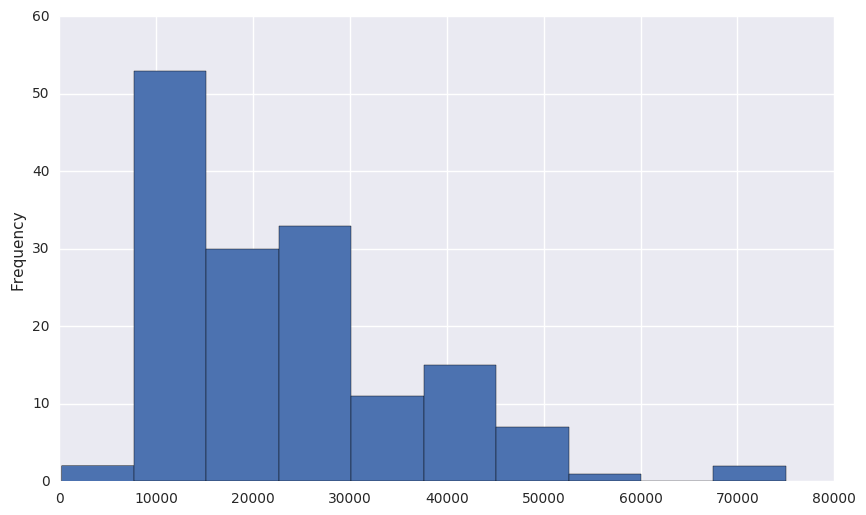

In [148]:
mathstatsDF['AwardAmount'].plot(kind='hist')

In [66]:
nsercDF.loc[(nsercDF['Department'].isin(['Mathematics']) 
             | nsercDF['Department'].isin(['Statistics']) 
             | nsercDF['Department'].isin(['Mathematics (St. George Campus)'])) 
            & (nsercDF['FiscalYear'].isin([2012]) ) 
            & (nsercDF['ProgramID'].isin(['RGPIN']))]

Name                 208
Department           208
OrganizationID       208
Institution          208
ProvinceEN           208
CountryEN            208
FiscalYear           208
AwardAmount          208
ProgramID            208
ProgramNameEN        208
ResearchSubjectEN    208
dtype: int64

In [105]:
nsercDF.loc[(nsercDF['Department'].isin(['Mathematics'])
            | nsercDF['Department'].isin(['Statistics'])
            | nsercDF['Department'].isin(['Mathematics (St. George Campus)'])) 
            & (nsercDF['FiscalYear'].isin([2012]) )
            & (nsercDF['ProgramID'].isin(['RGPIN']))
           ].describe()

,OrganizationID,FiscalYear,AwardAmount
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [155]:
msDG = nsercDF.loc[(nsercDF['Department'].isin(['Mathematics'])
            | nsercDF['Department'].isin(['Statistics'])
            | nsercDF['Department'].isin(['Mathematics (St. George Campus)'])
            | nsercDF['Department'].isin(['Mathematics (Toronto)'] )     ) 
           ]

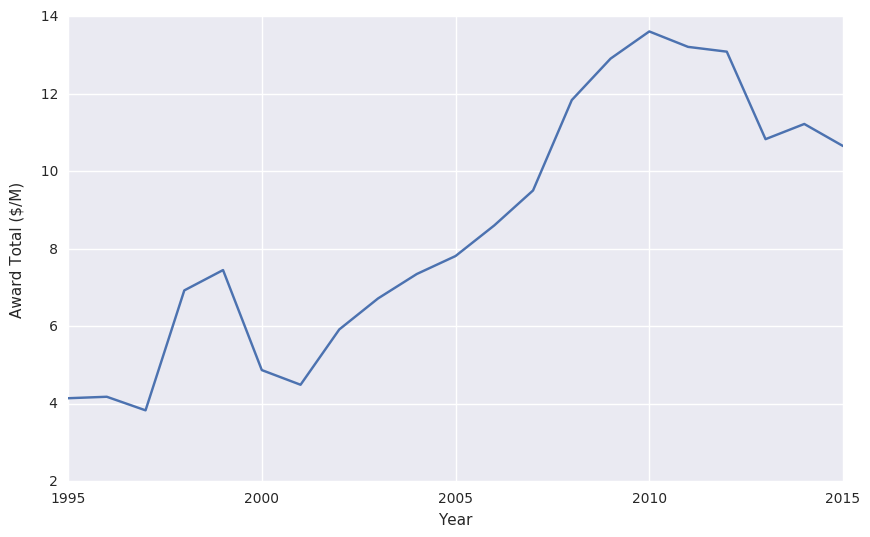

In [157]:
timeMath = msDG.groupby('FiscalYear').sum()['AwardAmount']

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(timeMath.index, timeMath/10**6)
ax.set_ylabel('Award Total ($/M)')
ax.set_xlabel('Year')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%4d'))

In [158]:
timeMath

FiscalYear
1995     4144552
1996     4182413
1997     3832206
1998     6927335
1999     7451986
2000     4871139
2001     4492316
2002     5919854
2003     6719777
2004     7350291
2005     7814303
2006     8604741
2007     9506685
2008    11839192
2009    12908325
2010    13609941
2011    13211808
2012    13088356
2013    10830088
2014    11222216
2015    10652615
Name: AwardAmount, dtype: int64

In [159]:
msDG.describe()

,OrganizationID,FiscalYear,AwardAmount
count,7337.000000,7337.000000,7.337000e+03
mean,205.538503,2005.890827,2.442144e+04
std,797.700448,5.713865,6.746707e+04
min,2.000000,1995.000000,9.800000e+01
25%,2.000000,2001.000000,1.050000e+04
50%,31.000000,2007.000000,1.740000e+04
75%,32.000000,2011.000000,2.500000e+04
max,28297.000000,2015.000000,2.407500e+06
